# 分裂二叉树的最大乘积

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/maximum-product-of-splitted-binary-tree**

## 一、题目

给你一棵二叉树，它的根为 root 。请你删除 1 条边，使二叉树分裂成两棵子树，且它们子树和的乘积尽可能大。

由于答案可能会很大，请你将结果对 10^9 + 7 取模后再返回。

## 二、示例

### 示例 1：

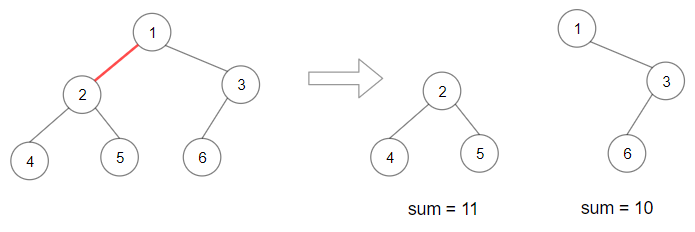

输入：root = [1,2,3,4,5,6]

输出：110

解释：删除红色的边，得到 2 棵子树，和分别为 11 和 10 。它们的乘积是 110 （11 * 10）

### 示例 2：

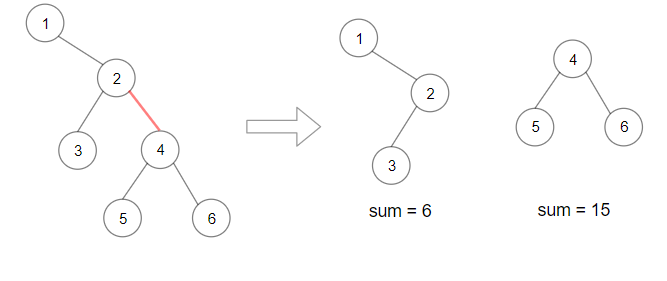

输入：root = [1,null,2,3,4,null,null,5,6]

输出：90

解释：移除红色的边，得到 2 棵子树，和分别是 15 和 6 。它们的乘积为 90 （15 * 6）

## 三、解题思路

### 计算每个子树的和

树型搜索的题目，一遍dfs(深度优先搜索)遍历二叉树，保存以每个节点为根子树的和。 然后枚举删除整个树和这个子树之间的边进行判断。

In [1]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [2]:
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(3)
root1.left.left = TreeNode(4)
root1.left.right = TreeNode(5)
root1.right.left = TreeNode(6)

root2 = TreeNode(1)
root2.right = TreeNode(2)
root2.right.left = TreeNode(3)
root2.right.right = TreeNode(4)
root2.right.right.left = TreeNode(5)
root2.right.right.right = TreeNode(6)

In [3]:
def maxProduct(root) :
    def dfs(root, num):
        num[root]  = root.val
        if root.left != None : num[root] += dfs(root.left, num)
        if root.right != None: num[root] += dfs(root.right, num)
        return num[root]
    num = {}
    dfs(root, num)
    ans, all = 0, num[root]
    for node in num:
        ans = max(ans , (all - num[node]) *num[node])
    return int(ans % (1e9+7))

In [4]:
maxProduct(root1)

110

In [5]:
maxProduct(root2)

90